**This notebook includes the following sections:**

**#01** Importing libraries and data

**#02** Choosing variablies

**#03** Creating heatmap

**#04** Creating scatterplot

**#05** Creating a pair plot

**#06** Creating a categorical plot

**#07** Answering business questions

**#08** Hypotheses

**#01 Importing libraries and data**

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [4]:
#Importing data
df = pd.read_pickle('/Users/gingermoore/Documents/06-2025 Airbnb Dallas/02 Data/Transformed Data/CleanDallasDataFinal.pkl')

**#02 Choosing variables**

In [6]:
#making sure I can see the entire list of columns
pd.set_option('display.max_columns', None)

In [7]:
df.head()

listing_id                           name  \
0      61878  MODERN LIVING AND FURNISHINGS   
1      61878  MODERN LIVING AND FURNISHINGS   
2      61878  MODERN LIVING AND FURNISHINGS   
3      61878  MODERN LIVING AND FURNISHINGS   
4      61878  MODERN LIVING AND FURNISHINGS   

                                         description  \
0  Close to downtown and Uptown.  Fast and conven...   
1  Close to downtown and Uptown.  Fast and conven...   
2  Close to downtown and Uptown.  Fast and conven...   
3  Close to downtown and Uptown.  Fast and conven...   
4  Close to downtown and Uptown.  Fast and conven...   

                               neighborhood_overview host_id host_since  \
0  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
1  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
2  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
3  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
4  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   

  host_location  host_response_time  host_response_rate  host_acceptance_rate  \
0   Roanoke, TX  within a few hours               100.0                  88.0   
1   Roanoke, TX  within a few hours               100.0                  88.0   
2   Roanoke, TX  within a few hours               100.0                  88.0   
3   Roanoke, TX  within a few hours               100.0                  88.0   
4   Roanoke, TX  within a few hours               100.0                  88.0   

  host_neighbourhood    district  latitude  longitude property_type  \
0           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
1           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
2           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
3           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
4           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   

         room_type  accommodates  bathrooms  bedrooms  beds  min_nights  \
0  Entire home/apt             3        1.0       1.0   2.0          30   
1  Entire home/apt             3        1.0       1.0   2.0          30   
2  Entire home/apt             3        1.0       1.0   2.0          30   
3  Entire home/apt             3        1.0       1.0   2.0          30   
4  Entire home/apt             3        1.0       1.0   2.0          30   

   max_nights  number_of_reviews  rating_score  accuracy_score  clean_score  \
0        1125                 56          4.71            4.79          4.6   
1        1125                 56          4.71            4.79          4.6   
2        1125                 56          4.71            4.79          4.6   
3        1125                 56          4.71            4.79          4.6   
4        1125                 56          4.71            4.79          4.6   

   checkin_score  comm_score  location_score  value_score  host_listings  \
0           4.85        4.93            4.75         4.78              1   
1           4.85        4.93            4.75         4.78              1   
2           4.85        4.93            4.75         4.78              1   
3           4.85        4.93            4.75         4.78              1   
4           4.85        4.93            4.75         4.78              1   

   host_entire_homes  host_private_rooms  host_shared_rooms  \
0                  1                   0                  0   
1                  1                   0                  0   
2                  1                   0                  0   
3                  1                   0                  0   
4                  1                   0                  0   

   reviews_per_month superhost_bool  instant_book_bool       date  price  \
0               0.32           True              False 2025-04-17   75.0   
1               0.32           True              False 2025-04-18   75.0   
2               0.32       

I'm going to start with questions that can be answered by the correlation matrix.

**Q:** How does the size of the listing relate to the price of the listing?

**Variables needed:** accomodates, price

**Q:** Do ratings impact pricing?

**Variables needed:** rating_score, price

**Q:** Do hosts with multiple listings tend to charge more than hosts with only one listing?

**Variables needed:** host_listings, price

In [9]:
#Creating a subset of the dataframe with only the necessary columns
df_viz = df[['accommodates', 'price', 'rating_score','host_listings']]

In [10]:
df_viz.shape

(1922800, 4)

**#03 Creating heatmap**

In [12]:
plot = df_viz.corr()

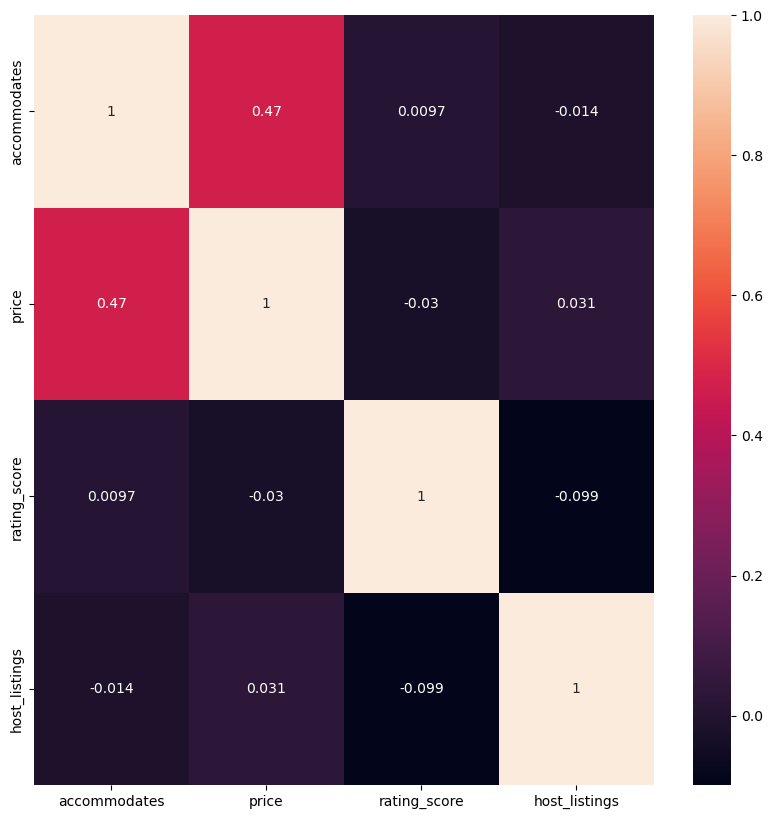

In [13]:
#Creating subplot in matplotlib
f,ax = plt.subplots(figsize=(10,10))

#Creating the heatmap in seaborn
listing_price = sns.heatmap(plot, annot = True, ax = ax)

**Correlation Explanations**

*Accommodates x Price* - These variables have a strong positive relationship.

*Accommodates x Rating_Score* - These variables have essentially no relationship.

*Accommodates x Host_Listings* - These variables have essentially no relationship.

*Price x Rating_Score* - These variables have essentially no relationship.

*Price x Host_Listings* - These variables have essentially no relationship.

*Rating_Score x Host_Listings* - These variables have essentially no relationship.

**#04 Creating scatterplot**

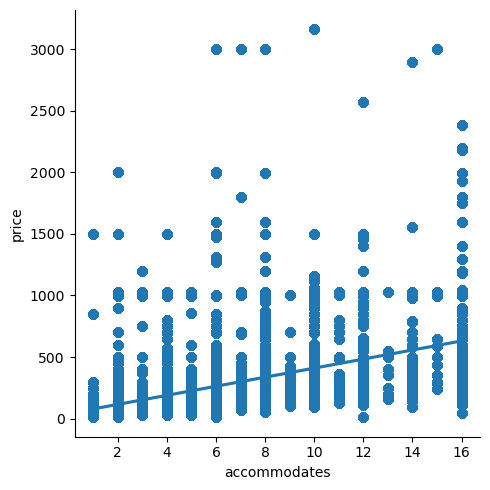

In [16]:
#Creating scatterplot with Price and Host_Listings variables as they are the most closely correlated
sns.lmplot(x = 'accommodates', y = 'price', data = df)

**#05 Creating a pair plot**

I first tried creating a pair plot for the whole dataset, but I have so many variables that the plot was impossible to read (not to mention it took forever to run the code). Let's explore something, though: does the latitude and longitude affect price and general rating score?

In [82]:
#Creating subset with only necessary columns
df_pair = df[['latitude', 'longitude', 'price', 'rating_score']]
df_pair.corr()

latitude  longitude     price  rating_score
latitude      1.000000   0.163504  0.018941     -0.055372
longitude     0.163504   1.000000 -0.066152     -0.026774
price         0.018941  -0.066152  1.000000     -0.029935
rating_score -0.055372  -0.026774 -0.029935      1.000000

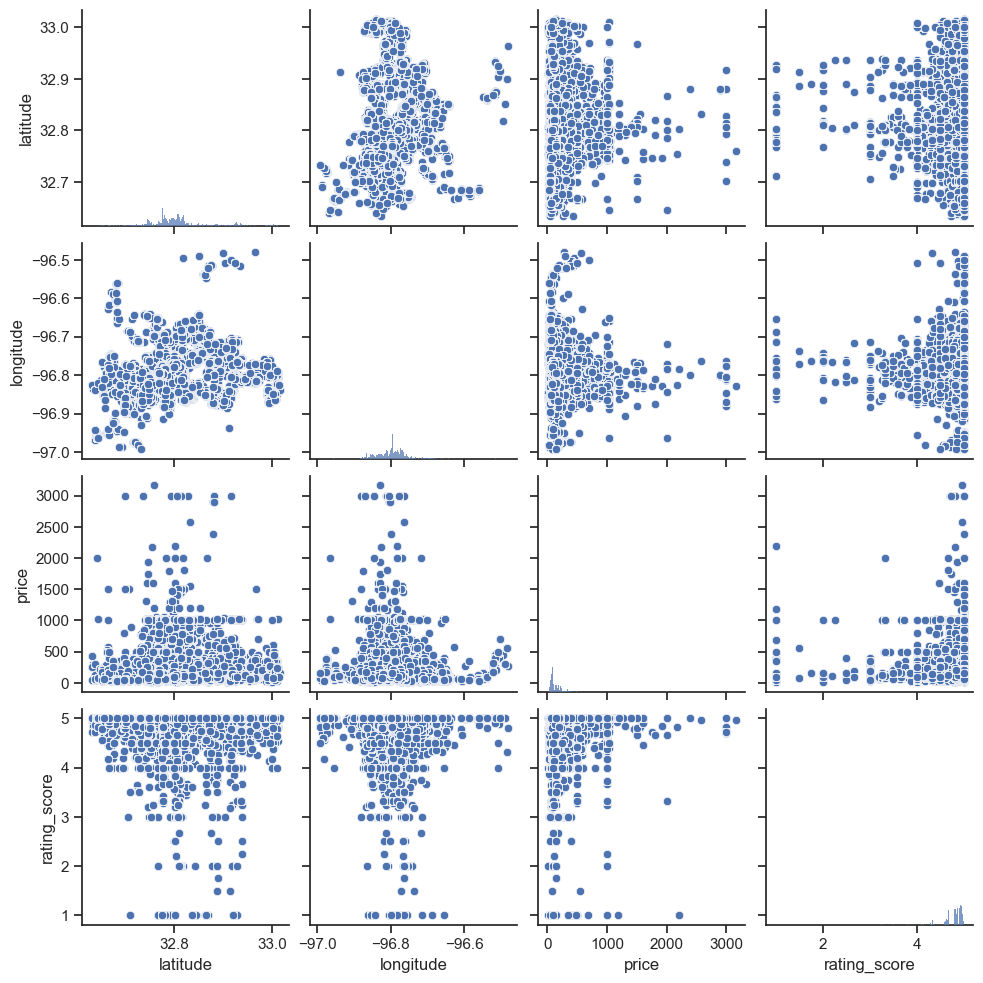

In [80]:
pair = sns.pairplot(df_pair)

This is interesting! I thought I would find that there was some kind of relationship between location and rating or price--like North Dallas being more expensive than South, or something along those lines. However, this pair plot shows no such correlation. Other than the relationship we can expect between latitude and longitude, there are no correlations here.

**#06 Creating a categorical plot**

I'd like more information on the relationship between price and accommodations, so I'll go a little deeper with my catplot. Is there a relationship between the number of beds and the price of the listing?

<Axes: xlabel='beds', ylabel='Count'>

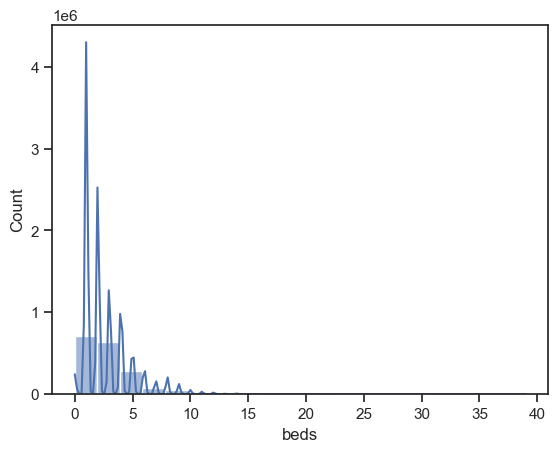

In [114]:
#Creating a histogram of the number of beds
sns.histplot(df['beds'], bins = 20, kde = True)

In [142]:
#Creating categories based on number of beds
df.loc[df['beds'] <= 4, 'occupancy'] = 'low_occupancy'
df.loc[(df['beds'] > 4) & (df['beds'] < 10), 'occupancy'] = 'med_occupancy'
df.loc[df['beds'] >= 10, 'occupancy'] = 'high_occupancy'

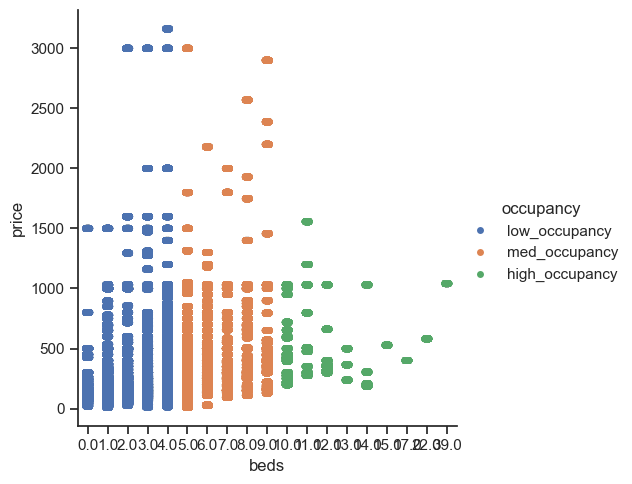

In [144]:
#Creating the categorical plot
sns.set(style="ticks")
occupants = sns.catplot(x='beds', y='price', hue='occupancy', data=df)
plt.show()

The catplot shows what I expected--there's a strong positive correlation between the number of beds and the price. As the number of beds in a listing goes up, the price tends to go up as well. There are a few interesting outliers--the highest-priced listing is classed as low-occupancy--but overall, the correlation holds.

**#07 Answering business questions**

**Q:** How does the size of the listing relate to the price of the listing?

**A:** There is a strong positive correlation between the number of people a listing accommodates and the price of the listing. In other words, listings that can house more people are likely going to be more expensive.

**Q:** Do ratings impact pricing?

**A:** There is no evidence to suggest that higher ratings are correlated with higher pricing. So good news, marketing team: even the Airbnbs with the highest ratings are still affordable!

**Q:** Do hosts with multiple listings tend to charge more than hosts with only one listing?

**A:** There is no evidence to suggest that hosts who manage more listings tend to charge more. 

**#08 Hypotheses**

**Hypothesis 1:** If a guest wants to book an Airbnb that will host four or more people, then the price will be higher than if the listing accommodates fewer people.

**Hypothesis 2:** If an Airbnb has x number of beds, it will accommodate x number of people or more.